In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.random import seed
from IPython.display import clear_output

%matplotlib inline


In [2]:
# Reloading to avoid import errors
import importlib
import logistic_regression
importlib.reload(logistic_regression)
from logistic_regression import *

import neural_network
importlib.reload(neural_network)
from neural_network import *

import plotting
importlib.reload(plotting)
from plotting import *


In [3]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1, 1]
regularizations = [0, 1e-4 ,1e-3, 1e-2, 1e-1]

scores = np.zeros((len(learning_rates), len(regularizations)))

for i, lr in enumerate(learning_rates):
        for j, reg in enumerate(regularizations):
            model = HomeMadeLogisticRegression(scheduler=Adam(lr),
                                                n_epochs=1000,
                                                n_batches=10, 
                                                lambda_reg=reg)
            try:
                model.SGDfit(X_train_scaled, y_train)
                y_pred_test = model.predict(X_test_scaled)
                test_accuracy = accuracy_score(y_test, y_pred_test)
            except:
                 test_accuracy = None
            scores[i, j] = test_accuracy
clear_output()
print('Finished!')

Epoch 10/1000, Loss: 0.6302
Epoch 20/1000, Loss: 0.5966
Epoch 30/1000, Loss: 0.5717
Epoch 40/1000, Loss: 0.5525
Epoch 50/1000, Loss: 0.5368
Epoch 60/1000, Loss: 0.5210
Epoch 70/1000, Loss: 0.5100
Epoch 80/1000, Loss: 0.4981
Epoch 90/1000, Loss: 0.4877
Epoch 100/1000, Loss: 0.4779
Epoch 110/1000, Loss: 0.4682
Epoch 120/1000, Loss: 0.4598
Epoch 130/1000, Loss: 0.4517
Epoch 140/1000, Loss: 0.4428
Epoch 150/1000, Loss: 0.4358
Epoch 160/1000, Loss: 0.4283
Epoch 170/1000, Loss: 0.4210
Epoch 180/1000, Loss: 0.4147
Epoch 190/1000, Loss: 0.4090
Epoch 200/1000, Loss: 0.4029
Epoch 210/1000, Loss: 0.3974
Epoch 220/1000, Loss: 0.3921
Epoch 230/1000, Loss: 0.3847
Epoch 240/1000, Loss: 0.3799
Epoch 250/1000, Loss: 0.3749
Epoch 260/1000, Loss: 0.3702
Epoch 270/1000, Loss: 0.3648
Epoch 280/1000, Loss: 0.3622
Epoch 290/1000, Loss: 0.3570
Epoch 300/1000, Loss: 0.3526
Epoch 310/1000, Loss: 0.3484
Epoch 320/1000, Loss: 0.3408
Epoch 330/1000, Loss: 0.3391
Epoch 340/1000, Loss: 0.3358
Epoch 350/1000, Loss: 0

Text(21.232860834911612, 0.5, 'Learning rate')

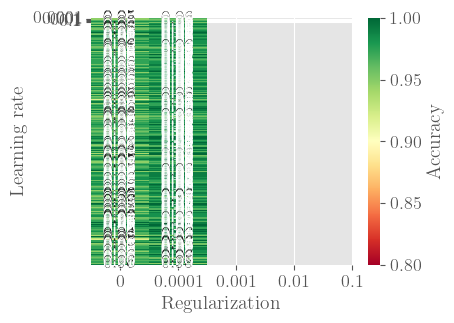

In [ ]:
_, fig = make_plot('gridsearch')
sns.heatmap(scores, annot=True, xticklabels=regularizations, yticklabels=learning_rates, cmap='RdYlGn', cbar=True, cbar_kws={'label': 'Accuracy'}, vmin=0.8, vmax=1)
plt.xlabel('Regularization')
plt.ylabel('Learning rate')
plt.savefig('./figures/own_logreg_lr_reg_gridsearch.pdf', bbox_inches = 'tight')

Epoch 10/1000, Loss: 0.0600
Epoch 20/1000, Loss: 0.0560
Epoch 30/1000, Loss: 0.0560
Epoch 40/1000, Loss: 0.0553
Epoch 50/1000, Loss: 0.0552
Epoch 60/1000, Loss: 0.0535
Epoch 70/1000, Loss: 0.0536
Epoch 80/1000, Loss: 0.0539
Epoch 90/1000, Loss: 0.0546
Epoch 100/1000, Loss: 0.0540
Epoch 110/1000, Loss: 0.0540
Epoch 120/1000, Loss: 0.0550
Epoch 130/1000, Loss: 0.0540
Epoch 140/1000, Loss: 0.0530
Epoch 150/1000, Loss: 0.0538
Epoch 160/1000, Loss: 0.0506
Epoch 170/1000, Loss: 0.0537
Epoch 180/1000, Loss: 0.0534
Epoch 190/1000, Loss: 0.0533
Epoch 200/1000, Loss: 0.0523
Epoch 210/1000, Loss: 0.0531
Epoch 220/1000, Loss: 0.0497
Epoch 230/1000, Loss: 0.0536
Epoch 240/1000, Loss: 0.0535
Epoch 250/1000, Loss: 0.0552
Epoch 260/1000, Loss: 0.0535
Epoch 270/1000, Loss: 0.0534
Epoch 280/1000, Loss: 0.0533
Epoch 290/1000, Loss: 0.0535
Epoch 300/1000, Loss: 0.0547
Epoch 310/1000, Loss: 0.0532
Epoch 320/1000, Loss: 0.0536
Epoch 330/1000, Loss: 0.0540
Epoch 340/1000, Loss: 0.0532
Epoch 350/1000, Loss: 0

<Figure size 420x320 with 0 Axes>

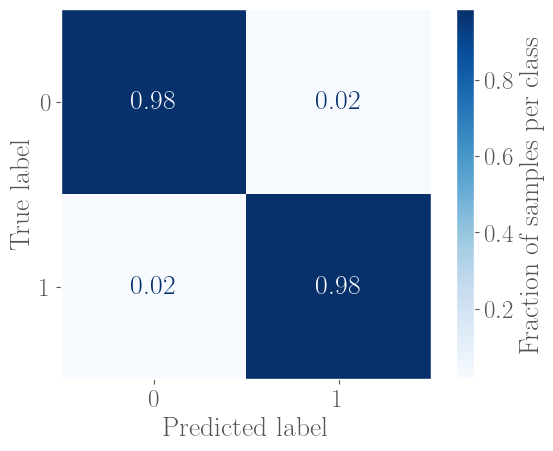

In [ ]:
best_lr = 0.1
best_reg = 0.001

model = HomeMadeLogisticRegression(scheduler=Adam(best_lr),
                                                n_epochs=1000,
                                                n_batches=10, 
                                                lambda_reg=best_reg)
model.SGDfit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)

# confusion matrix
cm = confusion_matrix(y_test,  y_pred_test, normalize='true')  # Normalizes by row

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.style.use('ggplot')

plt.figure(figsize=(4.2, 3.2))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.labelspacing'] = 0.25 
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
disp.plot(cmap='Blues', values_format='.2f')  # Display values as decimals with two decimal places
disp.im_.colorbar.set_label("Fraction of samples per class")
# Add a colorbar label
plt.grid(False)
plt.savefig('../figures/ownLogReg_clas_adamlr0.1_reg0.001_confusion.pdf', bbox_inches='tight')
clear_output()
print('Finished!')

In [7]:
from neural_network import *
seed = 2024
# FFNN setup
best_nodes = 8
best_layers = 2


In [ ]:
# Load the breast cancer dataset
X = cancer.data
target = cancer.target
target = target.reshape(target.shape[0], 1)

n = 300
FFNN_accuracy = np.zeros(n)
for i in range(n):
    # Split the data
    X_train, X_val, t_train, t_val = train_test_split(X, target, test_size=0.2, random_state=i*2)

    scaler = StandardScaler() 
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)

    #FFNN
    dims = (X_train.shape[1], *[best_nodes]*best_layers, 1)
    neural_network = FFNN(dims,
                            hidden_func=sigmoid,
                            output_func=sigmoid,
                            cost_func=CostLogReg,
                            seed=seed)
    
    result = neural_network.fit(X_train, t_train, Adam(eta=0.001), X_val=X_val, t_val=t_val, epochs=1000, batches=10, lam=0.001)
    FFNN_accuracy[i] = result['val_accs'][-1]
clear_output()
print('Finished!')


Adam: Eta=0.001, Lambda=0.001
  [----------------------------------------] 0.2000% | train_error: 12.3 | train_acc: 0.409 | val_error: 12.5 | val_acc: 0.395 

  [=======================================>] 100.0% | train_error: 0.228 | train_acc: 0.989 | val_error: 1.09 | val_acc: 0.947  Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.182 | train_acc: 0.991 | val_error: 1.09 | val_acc: 0.947  Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.0911 | train_acc: 0.996 | val_error: 0.727 | val_acc: 0.965 Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.0911 | train_acc: 0.996 | val_error: 0.545 | val_acc: 0.974 Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | train_error: -0.0000000010 | train_acc: 1.00 | val_error: 0.364 | val_acc: 0.982 Adam: Eta=0.001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.137 | train_acc: 0.993 | val_error: 0.727 | val_acc: 0.965  Adam: Eta=0.001, Lambda=0.001
  [=======================================

In [ ]:
# from sklearn.model_selection import RepeatedKFold
# n_folds = 10
# n_loops = 20
# rkf = RepeatedKFold(n_splits=n_folds, n_repeats=n_loops, random_state=2024)
# logreg_accuracy = np.zeros(n_folds*n_loops)
# X, y = cancer.data, cancer.target

# for i, (train_idx, test_idx) in enumerate(rkf.split(X)):
#     #logreg
#     cancer = load_breast_cancer()
    

#     # Split the data
#     # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*2)
#     X_train, X_test = X[train_idx,:], X[test_idx,:]
#     y_train, y_test = y[train_idx], y[test_idx]

#     # Scale the features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
#     logreg = HomeMadeLogisticRegression(scheduler=Adam(eta = 0.001),
#                                                 n_epochs=1000,
#                                                 n_batches=10, 
#                                                 lambda_reg=0.001)
#     logreg.SGDfit(X_train_scaled, y_train)
#     y_pred_test = logreg.predict(X_test_scaled)
#     logreg_accuracy[i] = accuracy_score(y_test, y_pred_test)
n = 300
logreg_accuracy = np.zeros(n)
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
for i in range(n):
    #logreg
    

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*2)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    logreg = HomeMadeLogisticRegression(scheduler=Adam(eta = 0.001),
                                                n_epochs=1000,
                                                n_batches=10, 
                                                lambda_reg=0.001)
    logreg.SGDfit(X_train_scaled, y_train)
    y_pred_test = logreg.predict(X_test_scaled)
    logreg_accuracy[i] = accuracy_score(y_test, y_pred_test)

clear_output()
print('Finished!')

Epoch 10/1000, Loss: 0.3437
Epoch 20/1000, Loss: 0.2719
Epoch 30/1000, Loss: 0.2354
Epoch 40/1000, Loss: 0.2107
Epoch 50/1000, Loss: 0.1920
Epoch 60/1000, Loss: 0.1781
Epoch 70/1000, Loss: 0.1685
Epoch 80/1000, Loss: 0.1601
Epoch 90/1000, Loss: 0.1526
Epoch 100/1000, Loss: 0.1457
Epoch 110/1000, Loss: 0.1402
Epoch 120/1000, Loss: 0.1355
Epoch 130/1000, Loss: 0.1295
Epoch 140/1000, Loss: 0.1253
Epoch 150/1000, Loss: 0.1234
Epoch 160/1000, Loss: 0.1194
Epoch 170/1000, Loss: 0.1170
Epoch 180/1000, Loss: 0.1144
Epoch 190/1000, Loss: 0.1104
Epoch 200/1000, Loss: 0.1092
Epoch 210/1000, Loss: 0.1071
Epoch 220/1000, Loss: 0.1033
Epoch 230/1000, Loss: 0.1023
Epoch 240/1000, Loss: 0.1009
Epoch 250/1000, Loss: 0.0992
Epoch 260/1000, Loss: 0.0967
Epoch 270/1000, Loss: 0.0958
Epoch 280/1000, Loss: 0.0931
Epoch 290/1000, Loss: 0.0927
Epoch 300/1000, Loss: 0.0912
Epoch 310/1000, Loss: 0.0893
Epoch 320/1000, Loss: 0.0879
Epoch 330/1000, Loss: 0.0876
Epoch 340/1000, Loss: 0.0853
Epoch 350/1000, Loss: 0

[0.9122807  0.92105263 0.92982456 0.93859649 0.94736842 0.95614035
 0.96491228 0.97368421 0.98245614 0.99122807 1.        ]


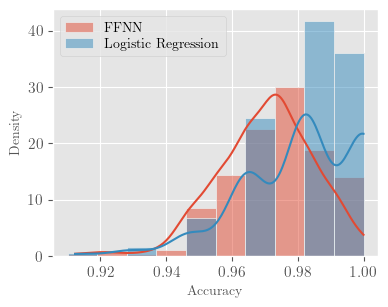

In [ ]:
import numpy as np
import seaborn.objects as so
import matplotlib.pyplot as plt

# np.save('FFNN_accuracy', FFNN_accuracy)
plt.figure(figsize=(10, 6))
_,fig = make_plot('full-width')
# Plot FFNN accuracies
bins = np.linspace(0.91, 1, 11)
sns.histplot(FFNN_accuracy, bins=bins, color='C0', alpha=0.5, label='FFNN', kde=True, stat='density',binrange=(0.91,1))

# Plot Logistic Regression accuracies
sns.histplot(logreg_accuracy, bins=bins, color='C1', alpha=0.5, label='Logistic Regression', kde=True, stat='density',binrange=(0.91,1))# Customize and show the plot
plt.xlabel('Accuracy')
plt.legend()
plt.savefig('../figures/FFNN_logreg_300seeds.pdf')

plt.show()


# bins = 20 

# ffnn_counts, bin_edges = np.histogram(FFNN_accuracy, bins=bins, range=(min(FFNN_accuracy), max(FFNN_accuracy)))
# logreg_counts, _ = np.histogram(logreg_accuracy, bins=bin_edges)

# bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
# width = (bin_edges[1] - bin_edges[0]) / 3  # Width for each bar (adjust as needed)

# _,fig = make_plot('full-width')
# plt.bar(bin_centers - width, ffnn_counts, width=width, color='tab:blue', edgecolor='black', label='FFNN')
# plt.bar(bin_centers + width, logreg_counts, width=width, color='tab:red', edgecolor='black', label='LogReg', alpha=0.7)

# # Labels and title
# plt.xlabel('Accuracy Score')
# plt.ylabel('Number of Occurrences')
# # plt.title('Distribution of Accuracy Scores for 500 Different Seeds')
# plt.legend()
# plt.savefig('../figures/FFNN_logreg_300seeds.pdf')

# plt.show()


In [ ]:
n = 20
logreg_accuracy_test = np.zeros(n)
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
print(len(X)*0.2)
for i in range(n):
    #logreg
    

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i**2)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    logreg = HomeMadeLogisticRegression(scheduler=Adam(eta = 0.001),
                                                n_epochs=1000,
                                                n_batches=10, 
                                                lambda_reg=0.001)
    logreg.SGDfit(X_train_scaled, y_train)
    y_pred_test = logreg.predict(X_test_scaled)
    logreg_accuracy_test[i] = accuracy_score(y_test, y_pred_test)
clear_output()
print('Finished!')

113.80000000000001
Epoch 10/1000, Loss: 0.3451
Epoch 20/1000, Loss: 0.2704
Epoch 30/1000, Loss: 0.2319
Epoch 40/1000, Loss: 0.2104
Epoch 50/1000, Loss: 0.1930
Epoch 60/1000, Loss: 0.1801
Epoch 70/1000, Loss: 0.1685
Epoch 80/1000, Loss: 0.1606
Epoch 90/1000, Loss: 0.1518
Epoch 100/1000, Loss: 0.1453
Epoch 110/1000, Loss: 0.1396
Epoch 120/1000, Loss: 0.1306
Epoch 130/1000, Loss: 0.1294
Epoch 140/1000, Loss: 0.1270
Epoch 150/1000, Loss: 0.1235
Epoch 160/1000, Loss: 0.1186
Epoch 170/1000, Loss: 0.1167
Epoch 180/1000, Loss: 0.1137
Epoch 190/1000, Loss: 0.1111
Epoch 200/1000, Loss: 0.1088
Epoch 210/1000, Loss: 0.1069
Epoch 220/1000, Loss: 0.0991
Epoch 230/1000, Loss: 0.1018
Epoch 240/1000, Loss: 0.1004
Epoch 250/1000, Loss: 0.0982
Epoch 260/1000, Loss: 0.0937
Epoch 270/1000, Loss: 0.0956
Epoch 280/1000, Loss: 0.0934
Epoch 290/1000, Loss: 0.0870
Epoch 300/1000, Loss: 0.0905
Epoch 310/1000, Loss: 0.0903
Epoch 320/1000, Loss: 0.0889
Epoch 330/1000, Loss: 0.0872
Epoch 340/1000, Loss: 0.0863
Epoc

# Scikit logreg

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define hyperparameters
learning_rates = ['NA']
regularizations = [1e-2, 1, 10, 15, 50, 100, 500]

# Initialize score matrix
scores = np.zeros((len(learning_rates), len(regularizations)))

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform grid search
for i, lr in enumerate(learning_rates):
    for j, reg in enumerate(regularizations):
        # Set a high C for no regularization (since scikit-learn uses 1/C as regularization strength)
        C = 1 / reg if reg > 0 else 1e10  # large C approximates no regularization

        # Initialize the logistic regression model with parameters
        model = LogisticRegression(C=C, max_iter=1000, solver='lbfgs')
        
        # Fit model and predict
        model.fit(X_train_scaled, y_train)
        y_pred_test = model.predict(X_test_scaled)
        
        # Compute accuracy
        test_accuracy = accuracy_score(y_test, y_pred_test)
        scores[i, j] = test_accuracy

# Plotting the accuracy heatmap
_, fig = make_plot('standard')
sns.heatmap(scores, annot=True, xticklabels=regularizations, yticklabels=learning_rates, 
            cmap='RdYlGn', cbar=True, cbar_kws={'label': 'Accuracy'}, vmin=0.8, vmax=1)
plt.xlabel('Regularization (lambda)')
plt.ylabel('Learning Rate')
plt.show()


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpm3l9fx0_ 4a20e6ffd5ab334c50be8c6aebc1188a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./4a20e6ffd5ab334c50be8c6aebc1188a.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpm3l9fx0_/4a20e6ffd5ab334c50be8c6aebc1188a.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpehox5mkn 4a20e6ffd5ab334c50be8c6aebc1188a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./4a20e6ffd5ab334c50be8c6aebc1188a.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpehox5mkn/4a20e6ffd5ab334c50be8c6aebc1188a.log.




<Figure size 420x280 with 2 Axes>

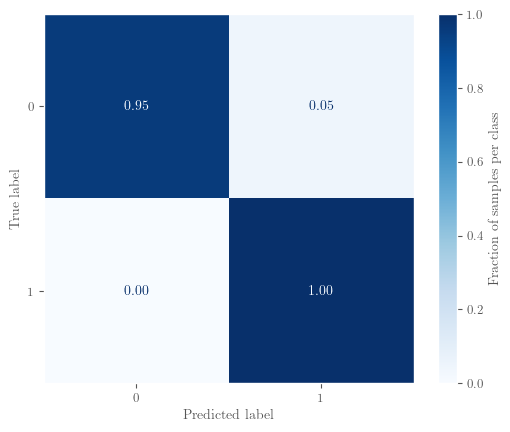

In [22]:
best_reg = 10
C = 1 / best_reg

model = LogisticRegression(C=C, max_iter=1000, solver='lbfgs')

# Fit model and predict
model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)

# confusion matrix
cm = confusion_matrix(y_test,  y_pred_test, normalize='true')  # Normalizes by row

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.2f')  # Display values as decimals with two decimal places
# Add a colorbar label
disp.im_.colorbar.set_label("Fraction of samples per class")
plt.grid(False)
plt.savefig('../figures/SKLogReg_clas_reg10_confusion.pdf')